C:\Users\Freef\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Decision Tree Accuracy: 0.711
AdaBoost Accuracy: 1.0


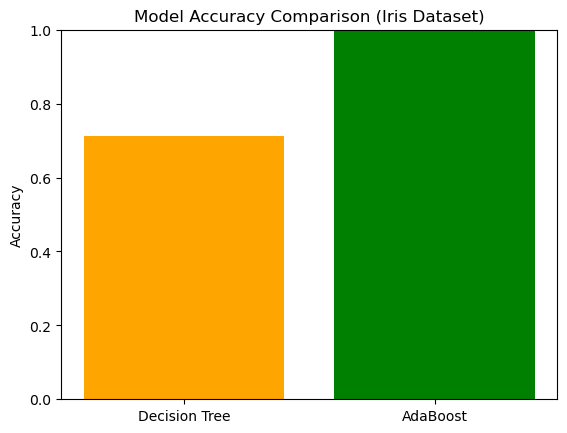

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Step 1. Load dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

# Step 2. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3. Base model - Decision Tree
dt = DecisionTreeClassifier(max_depth=1, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)

# Step 4. Ensemble model - AdaBoost
adaboost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)
adaboost.fit(X_train, y_train)
y_pred_ada = adaboost.predict(X_test)
acc_ada = accuracy_score(y_test, y_pred_ada)

# Step 5. Print and Compare
print("Decision Tree Accuracy:", round(acc_dt, 3))
print("AdaBoost Accuracy:", round(acc_ada, 3))

# Step 6. Simple Graph
models = ['Decision Tree', 'AdaBoost']
accuracy = [acc_dt, acc_ada]

plt.bar(models, accuracy, color=['orange', 'green'])
plt.title("Model Accuracy Comparison (Iris Dataset)")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()
